## This script checks if all the ROI atlases in functional space have all the ROIs

In [1]:
import numpy as np
import nibabel as nib

In [2]:
atlas_path = '/home1/varunk/results_again_again/ABIDE1_Preprocess_Datasink/atlas_paths/atlas_file_list.npy'
atlas_files = np.load(atlas_path)


In [3]:
atlas_files[41]

'/home1/varunk/results_again_again/ABIDE1_Preprocess/motion_correction_bet/coreg_reg/atlas_resize_reg_directory/_subject_id_0050045/std2func_xform/fullbrain_atlas_thr0-2mm_resample_flirt.nii'

In [4]:
in_file = atlas_files[40]
atlas_values_list = nib.load(in_file).get_data().ravel()

In [5]:
universe = set(np.arange(274))

In [6]:
universe - set(atlas_values_list)

{255}

In [7]:
set(atlas_values_list);

In [8]:
# Now the real code:
import re
universe = set(np.arange(274))
missing_ROIs = []
for index,in_file in enumerate(atlas_files):
    sub_id_extracted = re.search('.+_subject_id_(\d+)', in_file).group(1)
    print(sub_id_extracted)
    atlas_values = nib.load(in_file).get_data()
    atlas_values_list = atlas_values.ravel()
    atlas_values_max = max(atlas_values_list)  
    missing_ROIs.append((index,sub_id_extracted,list(universe - set(atlas_values_list)),atlas_values_max))

0050002
0050003
0050004
0050005
0050006
0050007
0050008
0050009
0050010
0050011
0050012
0050013
0050014
0050015
0050016
0050017
0050019
0050020
0050022
0050023
0050024
0050025
0050026
0050027
0050028
0050029
0050030
0050031
0050032
0050033
0050034
0050035
0050036
0050037
0050038
0050039
0050040
0050041
0050042
0050043
0050044
0050045
0050046
0050047
0050048
0050049
0050050
0050051
0050052
0050053
0050054
0050055
0050056
0050057
0050058
0050059
0050060
0050102
0050103
0050104
0050105
0050106
0050107
0050108
0050109
0050110
0050111
0050112
0050113
0050114
0050115
0050116
0050117
0050118
0050119
0050120
0050121
0050122
0050123
0050124
0050125
0050126
0050127
0050128
0050129
0050130
0050131
0050132
0050133
0050134
0050135
0050136
0050137
0050142
0050143
0050144
0050145
0050146
0050147
0050148
0050149
0050150
0050152
0050153
0050155
0050156
0050157
0050158
0050159
0050160
0050161
0050162
0050163
0050164
0050165
0050166
0050167
0050168
0050169
0050170
0050171
0050182
0050183
0050184
0050185


0051367
0051368
0051369
0051370
0051371
0051372
0051373
0051456
0051457
0051458
0051459
0051460
0051461
0051462
0051463
0051464
0051465
0051466
0051467
0051468
0051469
0051470
0051471
0051472
0051473
0051474
0051475
0051476
0051477
0051478
0051479
0051480
0051481
0051482
0051483
0051484
0051485
0051486
0051487
0051488
0051489
0051490
0051491
0051492
0051493
0051556
0051557
0051558
0051559
0051560
0051561
0051562
0051563
0051564
0051565
0051566
0051567
0051568
0051569
0051570
0051571
0051572
0051573
0051574
0051575
0051576
0051577
0051578
0051579
0051580
0051581
0051582
0051583
0051584
0051585
0051606
0051607


In [9]:
missing_ROIs

[(0, '0050002', [255], 274.0),
 (1, '0050003', [255], 274.0),
 (2, '0050004', [255], 274.0),
 (3, '0050005', [255], 274.0),
 (4, '0050006', [255], 274.0),
 (5, '0050007', [255], 274.0),
 (6, '0050008', [255], 274.0),
 (7, '0050009', [255], 274.0),
 (8, '0050010', [255], 274.0),
 (9, '0050011', [266, 268, 255], 274.0),
 (10, '0050012', [261, 255], 274.0),
 (11, '0050013', [255], 274.0),
 (12, '0050014', [255], 274.0),
 (13, '0050015', [255], 274.0),
 (14, '0050016', [255], 274.0),
 (15, '0050017', [266, 255], 274.0),
 (16, '0050019', [255], 274.0),
 (17, '0050020', [255], 274.0),
 (18, '0050022', [255], 274.0),
 (19, '0050023', [255], 274.0),
 (20, '0050024', [255], 274.0),
 (21, '0050025', [255], 274.0),
 (22, '0050026', [255], 274.0),
 (23, '0050027', [255], 274.0),
 (24, '0050028', [255], 274.0),
 (25, '0050029', [255], 274.0),
 (26, '0050030', [255], 274.0),
 (27, '0050031', [255], 274.0),
 (28, '0050032', [255], 274.0),
 (29, '0050033', [255], 274.0),
 (30, '0050034', [255], 274.0)

In [10]:
miss_refined = []
for miss in missing_ROIs:
    if miss[3] == 274.0 and len(miss[2]) == 3:
        miss_refined.append((miss[1],miss))

miss_refined

[('0050011', (9, '0050011', [266, 268, 255], 274.0)),
 ('0050050', (46, '0050050', [266, 268, 255], 274.0)),
 ('0051571', (1085, '0051571', [266, 268, 255], 274.0))]

In [11]:
bad_subjects = []
for i in miss_refined:
    bad_subjects.append(i[0])
    



In [12]:

bad_subjects = list(map(int, bad_subjects))
bad_subjects

[50011, 50050, 51571]

In [13]:
bad_rois = []
for sub in missing_ROIs:
    bad_rois.extend(sub[2])
    

In [14]:
# (bad_rois)

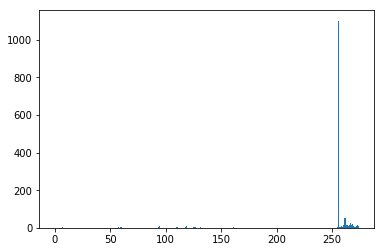

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

bins = np.arange(275)
count_roi = plt.hist(bad_rois, bins = bins)
# plt.ylim([0, 10])

### As seen from histogram most of the corrupted ROIs are in cerebellum.
* Therefore I have chosen to consider only the ROIs that are in brainetome.  
* Moreover in some of the subjects, ROIs belonging to Brainnetome atlas are also missing.


In [16]:
for i in zip(list(count_roi[0]),list(count_roi[1])):
    print(i)
# (Number of Subjects that doesnot have the ROI, ROI)    

(0.0, 0)
(0.0, 1)
(0.0, 2)
(0.0, 3)
(0.0, 4)
(0.0, 5)
(0.0, 6)
(2.0, 7)
(1.0, 8)
(0.0, 9)
(0.0, 10)
(0.0, 11)
(0.0, 12)
(0.0, 13)
(0.0, 14)
(1.0, 15)
(0.0, 16)
(1.0, 17)
(0.0, 18)
(1.0, 19)
(0.0, 20)
(1.0, 21)
(0.0, 22)
(0.0, 23)
(0.0, 24)
(1.0, 25)
(1.0, 26)
(1.0, 27)
(0.0, 28)
(1.0, 29)
(0.0, 30)
(1.0, 31)
(0.0, 32)
(1.0, 33)
(0.0, 34)
(1.0, 35)
(0.0, 36)
(1.0, 37)
(0.0, 38)
(1.0, 39)
(0.0, 40)
(0.0, 41)
(0.0, 42)
(1.0, 43)
(0.0, 44)
(0.0, 45)
(0.0, 46)
(0.0, 47)
(0.0, 48)
(0.0, 49)
(0.0, 50)
(1.0, 51)
(0.0, 52)
(0.0, 53)
(0.0, 54)
(1.0, 55)
(0.0, 56)
(2.0, 57)
(0.0, 58)
(4.0, 59)
(3.0, 60)
(1.0, 61)
(0.0, 62)
(1.0, 63)
(0.0, 64)
(1.0, 65)
(0.0, 66)
(1.0, 67)
(1.0, 68)
(1.0, 69)
(1.0, 70)
(0.0, 71)
(0.0, 72)
(0.0, 73)
(0.0, 74)
(0.0, 75)
(0.0, 76)
(0.0, 77)
(0.0, 78)
(1.0, 79)
(0.0, 80)
(0.0, 81)
(0.0, 82)
(1.0, 83)
(0.0, 84)
(0.0, 85)
(0.0, 86)
(0.0, 87)
(0.0, 88)
(0.0, 89)
(0.0, 90)
(0.0, 91)
(0.0, 92)
(3.0, 93)
(12.0, 94)
(0.0, 95)
(0.0, 96)
(0.0, 97)
(0.0, 98)
(0.0, 99)
(0.0, 100

### Missing ROIs(Brainnetome)
* ROI number 94 is missing in 12 subjects
    * Check if these 12 subjects are included in analysis, if they are then ignore the ROI
* Some others were also missing but in very few subjects -- Check
* ROI number 255 (of Cerebellum) is missing in all 1102 subjects

In [17]:
#  Runall:
import pandas as pd

df = pd.read_csv('/home1/varunk/data/ABIDE1/RawDataBIDs/composite_phenotypic_file.csv') # , index_col='SUB_ID'

df = df.sort_values(['SUB_ID'])
# df = df.sort_values(['SUB+AF8-ID'])

bugs = ['51232','51233','51242','51243','51244','51245','51246','51247','51270','51310', '50045']

# sub 50045 has fewer ROIs coz of more shift of head

In [18]:
# '0051242' in bugs

In [19]:
# df

In [20]:
# selecting Autistic males(DSM IV) of age <= 18 years 
df_aut_lt18_m = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 1)]

In [21]:
df_aut_lt18_m.shape

(214, 74)

In [22]:
df_aut_lt18_m_eyesopen = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 1) & (df['EYE_STATUS_AT_SCAN'] == 1)]
df_aut_lt18_m_eyesopen;
df_td_lt18_m_eyesopen = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 0) & (df['EYE_STATUS_AT_SCAN'] == 1)]
df_td_lt18_m_eyesopen;

In [23]:
df_aut_lt18_m_eyesopen_subid = df_aut_lt18_m_eyesopen.as_matrix(['SUB_ID']).squeeze()
df_td_lt18_m_eyesopen_subid = df_td_lt18_m_eyesopen.as_matrix(['SUB_ID']).squeeze()

In [24]:
# Sanity checks
set(df_aut_lt18_m_eyesopen_subid) - (set(df_aut_lt18_m_eyesopen_subid) - set(df_td_lt18_m_eyesopen_subid))

set()

In [25]:
df_aut_lt18_m_eyesclosed = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 1) & (df['EYE_STATUS_AT_SCAN'] == 2)]
df_aut_lt18_m_eyesclosed;
df_td_lt18_m_eyesclosed = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 0) & (df['EYE_STATUS_AT_SCAN'] == 2)]
df_td_lt18_m_eyesclosed;

In [26]:
df_aut_lt18_m_eyesclosed_subid = df_aut_lt18_m_eyesclosed.as_matrix(['SUB_ID']).squeeze()
df_td_lt18_m_eyesclosed_subid = df_td_lt18_m_eyesclosed.as_matrix(['SUB_ID']).squeeze()

In [27]:
# Sanity checks
set(df_aut_lt18_m_eyesclosed_subid) - (set(df_aut_lt18_m_eyesclosed_subid) - set(df_td_lt18_m_eyesclosed_subid))

set()

In [28]:
df_td_lt18_m_eyesclosed_subid

array([50031, 50033, 50034, 50035, 50043, 50044, 50045, 50047, 50048,
       50050, 50051, 50054, 50257, 50265, 50266, 50267, 50268, 50269,
       50724, 50725, 50726, 50727, 50728, 50731, 50732, 50733, 50734,
       50737, 50738, 50739, 50740, 50741, 50742, 51064, 51065, 51070,
       51071, 51072, 51073, 51074, 51075, 51076, 51077, 51133, 51134,
       51135, 51136, 51137, 51138, 51140, 51141, 51142, 51159, 51361, 51487])

In [29]:
# df_aut_lt18_m_eyesopen_subid

In [30]:
# set(bad_subjects)  - (set(bad_subjects) - set(df_aut_lt18_m_eyesopen_subid) ) 

In [31]:
# - set(bad_subjects);

In [32]:
sub_lt_246 = []
for sub in missing_ROIs:
#     missing_flag = False
#     for roi in sub[2]: # get the roi list for a subject
    if any(roi  < 246 for roi in sub[2]): # missing ROI is < 246 i.e belongs to brainettome
        sub_lt_246.append(sub)

In [33]:
len(sub_lt_246)

20

In [34]:
sub_lt_246

[(202, '0050279', [94, 255], 274.0),
 (209, '0050286', [94, 255], 274.0),
 (498,
  '0050643',
  [260,
   261,
   262,
   263,
   264,
   265,
   266,
   267,
   268,
   269,
   270,
   271,
   272,
   273,
   69,
   70,
   94,
   109,
   110,
   117,
   118,
   255],
  259.0),
 (503,
  '0050648',
  [260, 262, 263, 265, 266, 267, 268, 272, 93, 94, 255],
  273.0),
 (506,
  '0050651',
  [257,
   258,
   259,
   260,
   261,
   262,
   263,
   264,
   265,
   266,
   267,
   268,
   269,
   270,
   271,
   272,
   273,
   94,
   109,
   110,
   117,
   118,
   254,
   255],
  256.0),
 (507,
  '0050652',
  [258,
   260,
   261,
   262,
   263,
   264,
   265,
   266,
   267,
   268,
   269,
   110,
   270,
   271,
   272,
   273,
   118,
   94,
   255],
  259.0),
 (508, '0050653', [272, 118, 93, 94, 255], 273.0),
 (510,
  '0050655',
  [256,
   257,
   258,
   259,
   260,
   261,
   262,
   263,
   264,
   265,
   266,
   267,
   268,
   269,
   270,
   271,
   272,
   273,
   93,
   94,
  

In [35]:
# Now to find the Subjects that have corrupted ROIs < 246 with modified list

corrupted_rois_lt_246 = []
subj = []
for sub in sub_lt_246:
    sub_2 = np.array(sub[2])
    modified_list = np.sort(sub_2[np.where(sub_2 < 246)[0]])
    corrupted_rois_lt_246.append((sub[1],modified_list))
    subj.append(int(sub[1]))

In [36]:
corrupted_rois_lt_246, subj

([('0050279', array([94])),
  ('0050286', array([94])),
  ('0050643', array([ 69,  70,  94, 109, 110, 117, 118])),
  ('0050648', array([93, 94])),
  ('0050651', array([ 94, 109, 110, 117, 118])),
  ('0050652', array([ 94, 110, 118])),
  ('0050653', array([ 93,  94, 118])),
  ('0050655', array([ 93,  94, 109, 110, 112, 118])),
  ('0050658', array([ 94, 110, 118])),
  ('0050661', array([94])),
  ('0050667', array([94])),
  ('0050727',
   array([  7,   8,  25,  26,  55,  57,  59,  60,  65,  67,  68, 125, 126,
          127, 128, 131, 132, 147, 148, 149, 150, 161, 162])),
  ('0050736', array([ 7, 59, 60])),
  ('0050746',
   array([ 15,  17,  19,  21,  27,  29,  31,  33,  35,  37,  39,  43,  51,
           61,  63,  79,  83, 167])),
  ('0051276',
   array([ 57,  59, 125, 131, 161, 189, 190, 193, 194, 199, 200, 203, 204,
          205, 206, 207, 208])),
  ('0051462', array([126])),
  ('0051469', array([126])),
  ('0051470', array([ 59,  60, 125, 126])),
  ('0051472', array([126])),
  ('00515

In [37]:
subj = set(subj)

In [38]:
# Subjects that are in the problematic set that are in the AUTISTIC SET
set(subj) - (set(subj) - set(df_aut_lt18_m_eyesopen_subid))

{50279}

In [39]:
# Subjects that are in the problematic set that are in the TD SET
set(subj) - (set(subj) - set(df_td_lt18_m_eyesopen_subid))

{51276}

### Results: Remove & Ignore (Eyes Open): 
* Remove **sub-51276** from the TD as it contains a lot of Corrupted ROIs
* Ignore **ROI 94** as **sub-50279** belonging to Autistic group has corrupted ROI  


In [40]:
# Subjects that are in the problematic set that are in the AUTISTIC SET
set(subj) - (set(subj) - set(df_aut_lt18_m_eyesclosed_subid))

{50746, 51472}

In [41]:
# Subjects that are in the problematic set that are in the TD SET
set(subj) - (set(subj) - set(df_td_lt18_m_eyesclosed_subid))

{50727}

### Results: Remove & Ignore (Eyes Closed)
* Remove sub - 50746 as it contains a lot of corrupted ROIs
* Remove sub-50727 as it contains a lot of corrupted ROIs
* Ignore ROI 126 as it is corrupted in sub-51472


### Final Result:
* ROIs to ignore in Brainnetome - 126, 94
* Subjects to ignore 51276, 50746, 50727

In [42]:
# SUB - ROI
# 0050279 - 94
# 0050286 - 94
# 0050643 - 69,70,94,109,110,117,118
# 0050648 - 93,94
# 0050651 - 94,109,110,117,118
# 0050652 - 110,118,94
# 0050653 - 93,94,118
# 0050655 - 93,94,109,110,112,118
# 0050658 - 94,110,118

# Major realization:
* As many of the cerebellum ROIs were missing how could I compute the brain maps of cerebellum ?
* I think I sould look at the cerebellum ROIs once again to see which are the major brain areas that are missing in the cerebellum
* Cerebellum regions reported in OHBM 2018:
    * Right Crus I
    * Left Crus I
    * Right VI
    * Left V
    * Left VI
    
    Lets see which were wrong.
    


I have - **df_aut_lt18_m_eyesopen_subid** that denotes the sub ids of the bin that I have considered.  
Cerebellum ROIs are corrrupted from ROI number 254 onwards.  
I have to find the set diff between 

In [62]:
sub_gt_255 = []
for sub in missing_ROIs:
#     missing_flag = False
#     for roi in sub[2]: # get the roi list for a subject
    if any(roi  > 255 for roi in sub[2]): # missing ROI is < 246 i.e belongs to brainettome
        sub_gt_255.append(sub)

In [63]:
sub_gt_255

[(9, '0050011', [266, 268, 255], 274.0),
 (10, '0050012', [261, 255], 274.0),
 (15, '0050017', [266, 255], 274.0),
 (31, '0050035', [260, 262, 266, 268, 255], 274.0),
 (32, '0050036', [261, 255], 274.0),
 (34, '0050038', [261, 255], 274.0),
 (37, '0050041', [266, 255], 274.0),
 (41, '0050045', [260, 262, 263, 265, 266, 267, 268, 272, 255], 273.0),
 (46, '0050050', [266, 268, 255], 274.0),
 (51, '0050055', [261, 255], 274.0),
 (61, '0050106', [261, 255], 274.0),
 (66, '0050111', [261, 255], 274.0),
 (68, '0050113', [261, 255], 274.0),
 (71, '0050116', [261, 255], 274.0),
 (73, '0050118', [261, 255], 274.0),
 (79, '0050124', [261, 255], 274.0),
 (81, '0050126', [261, 255], 274.0),
 (83, '0050128', [261, 255], 274.0),
 (90, '0050135', [261, 255], 274.0),
 (92, '0050137', [261, 255], 274.0),
 (93, '0050142', [261, 255], 274.0),
 (99, '0050148', [261, 255], 274.0),
 (131, '0050192', [261, 255], 274.0),
 (135, '0050196', [261, 255], 274.0),
 (138, '0050199', [261, 255], 274.0),
 (232, '00503

In [77]:
# Now to find the Subjects that have corrupted ROIs > 254 with modified list

corrupted_rois_gt_255 = []
subj = []
for sub in sub_gt_255:
    sub_2 = np.array(sub[2])
    modified_list = np.sort(sub_2[np.where(np.logical_and((sub_2 > 255),(sub_2 != 261)))[0]])
    if len(modified_list != 0):
        corrupted_rois_gt_255.append((sub[1],modified_list))
        subj.append(int(sub[1]))

In [78]:
subj, corrupted_rois_gt_255

([50011,
  50017,
  50035,
  50041,
  50045,
  50050,
  50643,
  50644,
  50645,
  50648,
  50650,
  50651,
  50652,
  50653,
  50655,
  50657,
  50658,
  50667,
  50669,
  51276,
  51558,
  51566,
  51571,
  51572,
  51575,
  51582,
  51584],
 [('0050011', array([266, 268])),
  ('0050017', array([266])),
  ('0050035', array([260, 262, 266, 268])),
  ('0050041', array([266])),
  ('0050045', array([260, 262, 263, 265, 266, 267, 268, 272])),
  ('0050050', array([266, 268])),
  ('0050643',
   array([260, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273])),
  ('0050644',
   array([258, 260, 262, 263, 264, 265, 266, 267, 268, 269, 271, 272, 273])),
  ('0050645',
   array([256, 257, 258, 259, 260, 262, 263, 264, 265, 266, 267, 268, 269,
          270, 271, 272, 273])),
  ('0050648', array([260, 262, 263, 265, 266, 267, 268, 272])),
  ('0050650', array([260, 262, 263, 266, 268])),
  ('0050651',
   array([257, 258, 259, 260, 262, 263, 264, 265, 266, 267, 268, 269, 270,
          271,

In [79]:
# Subjects that are in the problematic set that are in the AUTISTIC SET
set(subj) - (set(subj) - set(df_aut_lt18_m_eyesopen_subid))

set()

In [80]:
# Subjects that are in the problematic set that are in the TD SET
set(subj) - (set(subj) - set(df_td_lt18_m_eyesopen_subid))

{51276}

Results:  
* Due to conversion of 2mm to 3mm ROI 255 has disappeared
* No subject in my bin has missing ROI of 254
* There are many subjects that have ROI 261 Missing so we can drop ROI 261 from out analysis
* Similarly there is just one subject in  my bin with ROI 258 missing. But this ROI has not shown up anyways in my results. Ignoring this ROI for some time. Let's go ahead and drop ROI 258 as well from my analysis.
* So finally I am dropping following ROIs from my analysis:
    * 255 - 
    * 258 - 
    * 261 -